In [5]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.ticker import MaxNLocator, MultipleLocator

print(yf.__version__)

0.2.66


In [6]:
aapl = yf.Ticker("AAPL")
a = '1y'
data = aapl.history(period = a)
print(data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2024-11-08 00:00:00-05:00  226.366414  227.851149  225.609108  226.157166   
2024-11-11 00:00:00-05:00  224.204094  224.901615  220.716475  223.436813   
2024-11-12 00:00:00-05:00  223.755689  224.792003  222.569896  223.436813   
2024-11-13 00:00:00-05:00  223.217580  225.848241  221.972002  224.323654   
2024-11-14 00:00:00-05:00  224.224027  228.060399  224.204094  227.412704   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-11-08 00:00:00-05:00  38328800       0.25           0.0  
2024-11-11 00:00:00-05:00  42005600       0.00           0.0  
2024-11-12 00:00:00-05:00  40398300       0.00           0.0  
2024-11-13 00:00:00-05:00  48566200       0.00           0.0  
2024-11-14 00:00:00-05:00  44923900       0.00           0.0  


In [7]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

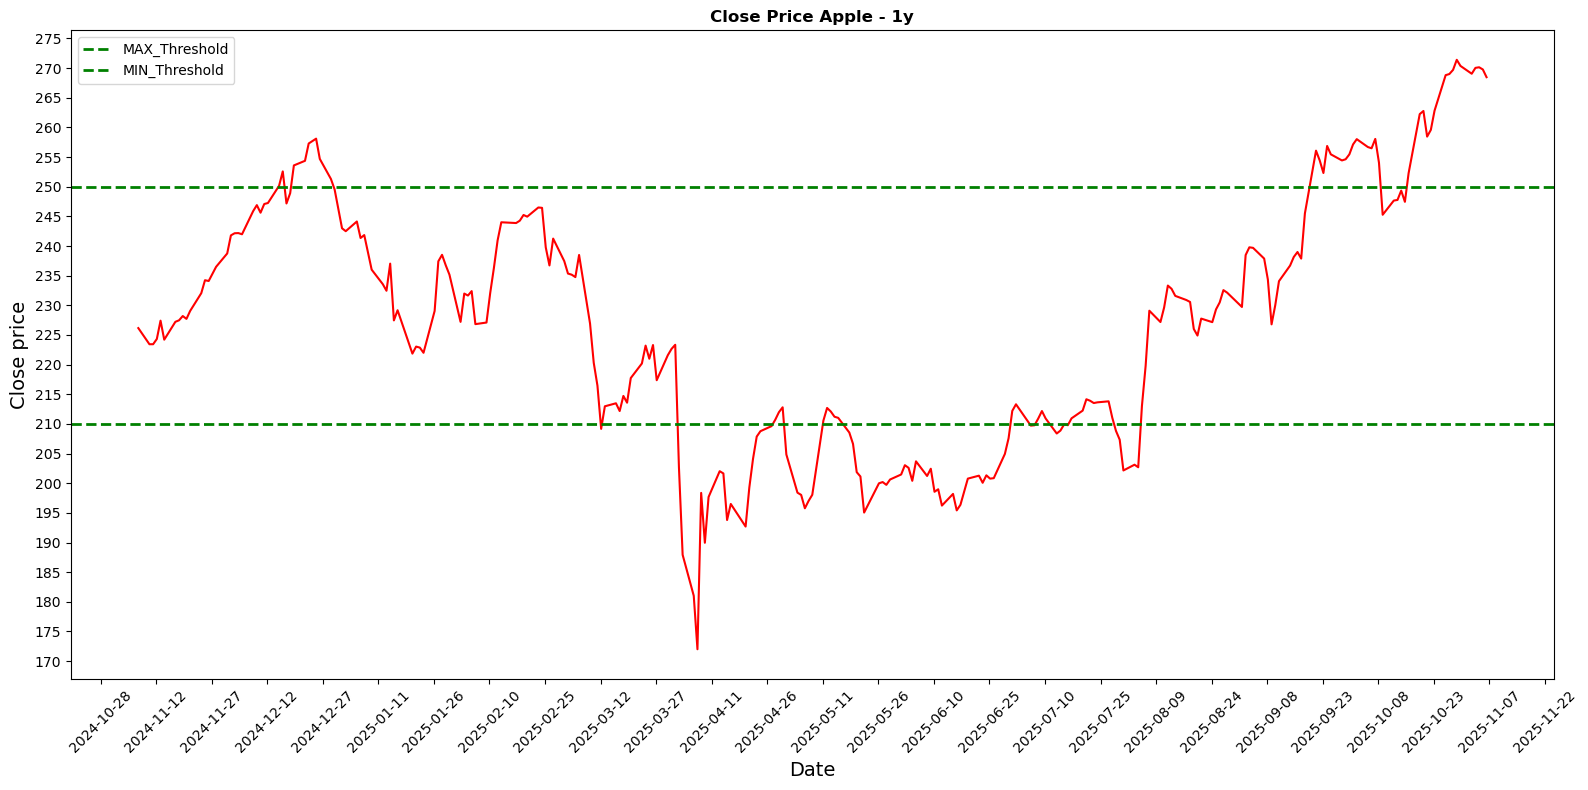

In [8]:
fig,ax = plt.subplots(1,1, figsize = (16,8), dpi = 100)
plt.plot(data.index,data["Close"], color = "red")
plt.title("Close Price Apple - %s" %a, fontweight = 'bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close price", fontsize=14)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.axhline(y=250, color='green', linestyle='--', linewidth=2, label='MAX_Threshold')
plt.axhline(y=210, color='green', linestyle='--', linewidth=2, label='MIN_Threshold')


ax.yaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_locator(MaxNLocator(30))
plt.tight_layout()
plt.legend()
plt.show()


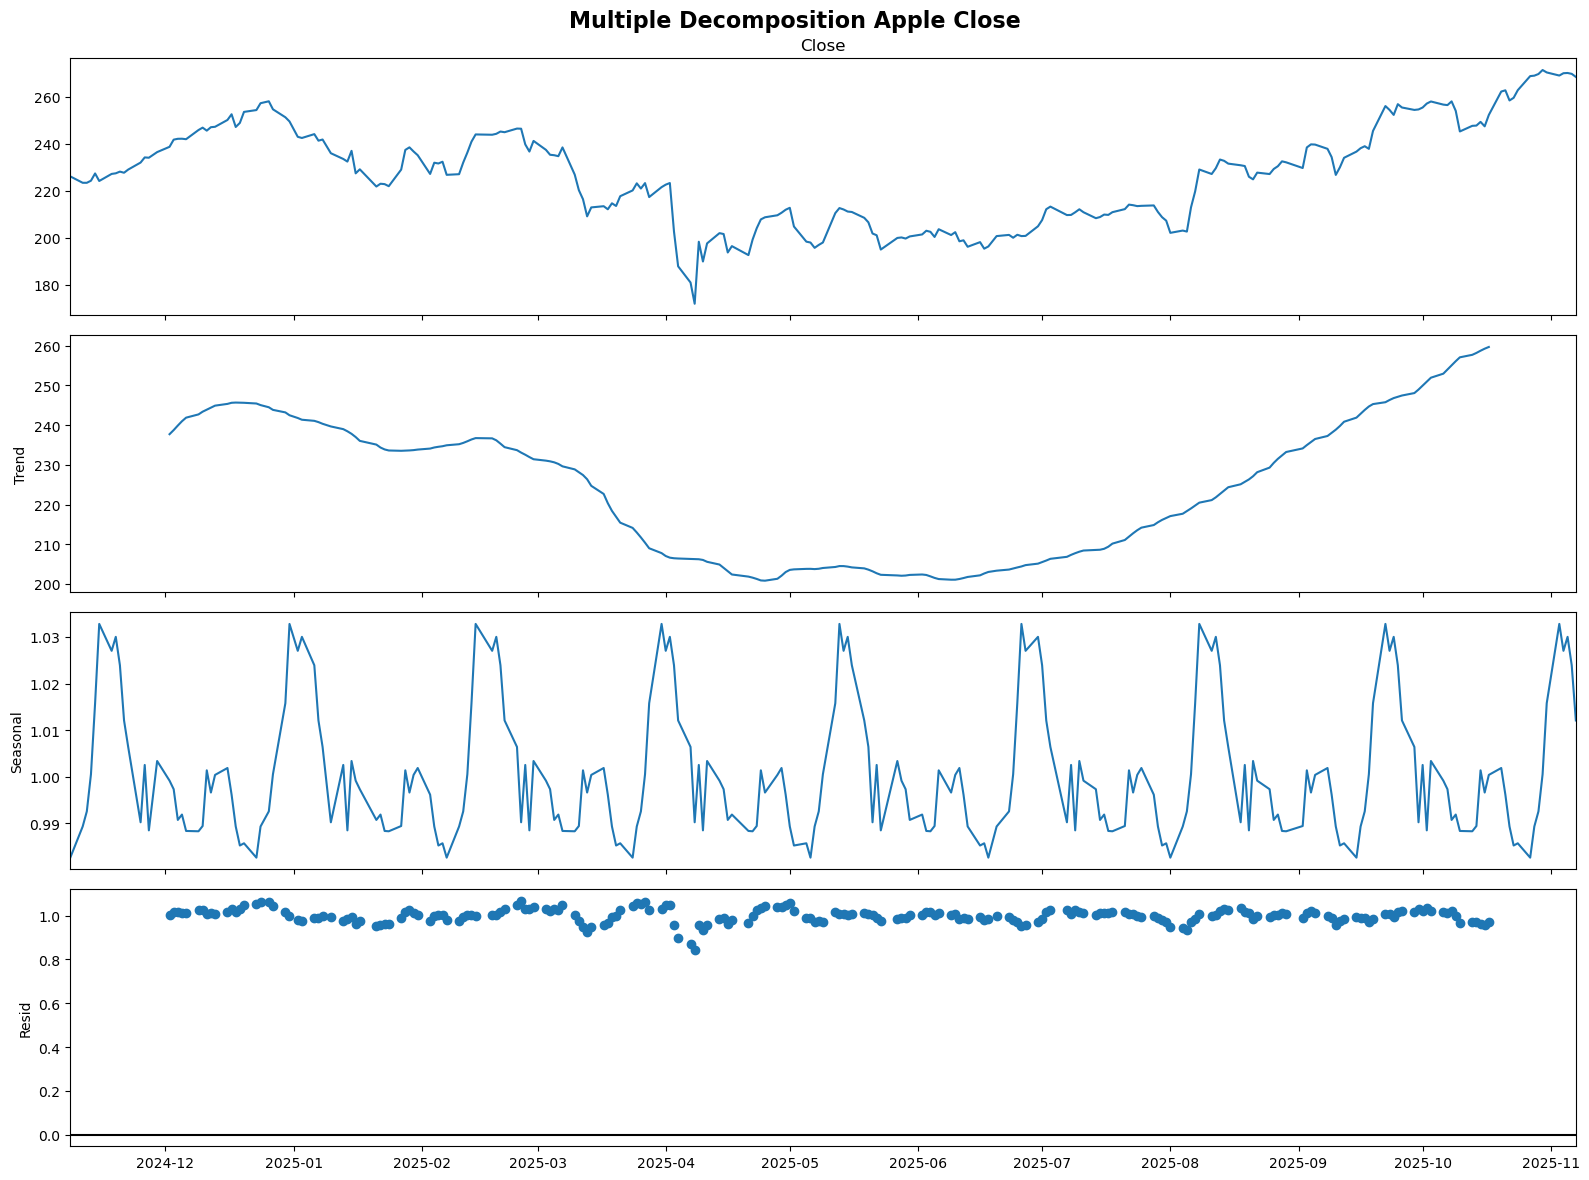

In [9]:
mult_decomp = seasonal_decompose(data["Close"], model = 'multiplicative', period = 30)

plt.rcParams.update({'figure.figsize': (16,12)})
mult_decomp.plot().suptitle('Multiple Decomposition Apple Close', fontweight = 'bold', fontsize = 16)
plt.tight_layout()
plt.show()

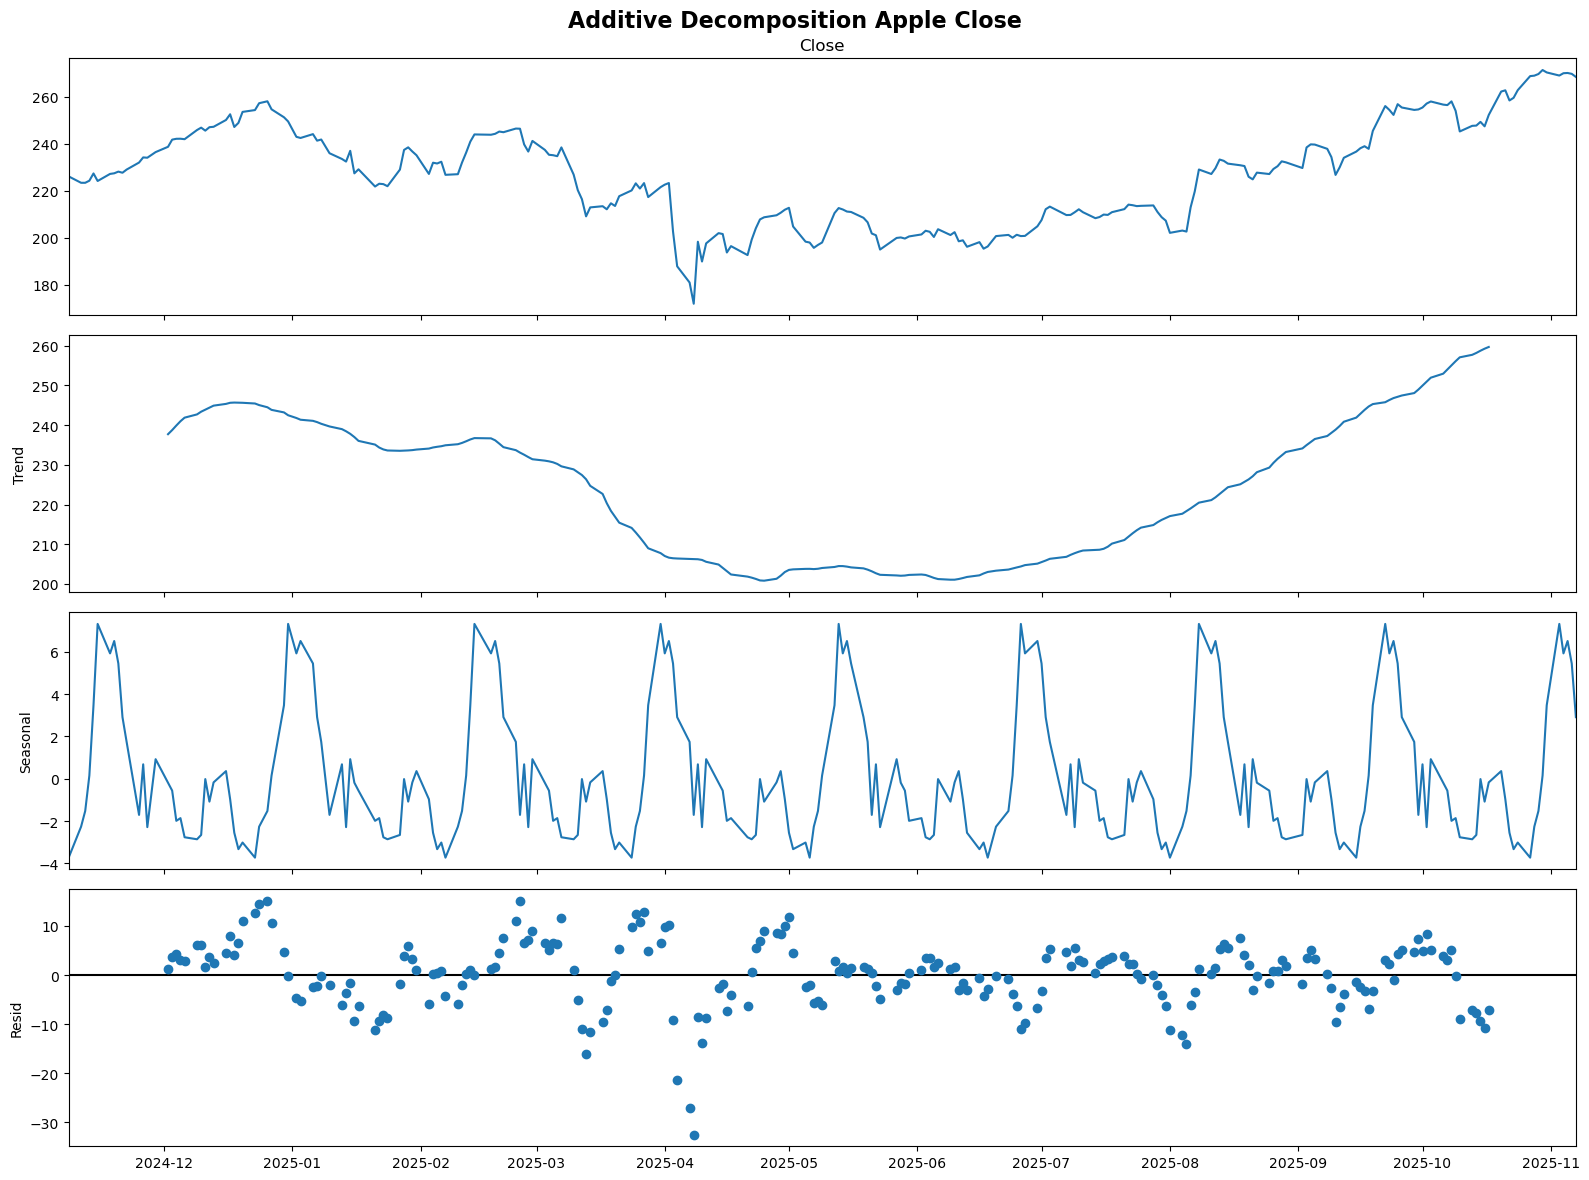

In [10]:
add_decomp = seasonal_decompose(data["Close"], model = 'additive', period = 30)

plt.rcParams.update({'figure.figsize': (16,12)})
add_decomp.plot().suptitle('Additive Decomposition Apple Close', fontweight = 'bold', fontsize = 16)
plt.tight_layout()

plt.show()